# Linear Regression using sklearn, statsmodel and Seaborn

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

We're going to dervice how a linear regression model is computed "by hand", but any practical use of the regression models (including your practicum) will use the provided libraries. 

The [`statsmodel` library](http://www.statsmodels.org/stable/index.html) provides two interfaces to routines that handle a variety of [regression tasks](http://www.statsmodels.org/dev/examples/index.html#regression). One is a simple numpy-based interface and the other is a "formula" based model. In that instance, we specify a regression model using formulas similar to the syntax in the R programming language. By and large, that's the library we'll use for simple linear and multi-linear regression and for logistic regresion. The documentation is a little more opaque than would be desired.

The [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) library has a broader set of generalize linear models or at least a better documented set of libraries. Both are available through Conda.

Lastly, we'll be using [`seaborn`](https://seaborn.pydata.org/) to visualize regresion models. Seaborn is useful for visualization but less useful when it comes to extracting values and parameters, so we'll often use Seaborn for visualization and statsmodel for analysis. Seaborn also uses bootstraping to estimate e.g. confidence intervals and paramaters and at times we may want to use more traditional tools (e.g. normal assumption t-Distribution).

Lastly, `numpy` has functions such as `polyfit` that handle some aspects of regression techniques.

In [2]:
import seaborn as sns
# Set color map to have light blue background
sns.set()

In [3]:
import statsmodels.formula.api as smf

## Simple linear regression

We're going to use the Advertising data as described in the text; this data set details sales and the amount of money spent on advertising in three media: TV, radio and newspaper. We'll first use this for a simple, *single factor* regression model predicting the sales per dollar of radio advertising.

In [7]:
ads = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', usecols=[1,2,3,4])

ads.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Let's assume that all the sales are due to TV advertising (it's not). Let's plot the data to get an overview of the relationship of sales and TV ads expenditures.

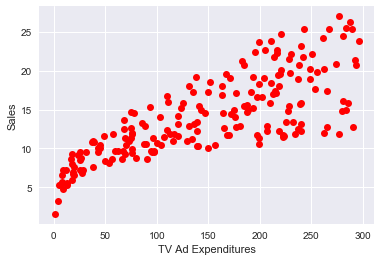

In [5]:
plt.plot(ads.TV, ads.sales, 'ro');
plt.xlabel('TV Ad Expenditures')
plt.ylabel('Sales');

### Simple Linear Regression Model

There's clearly a relationship between TV ads and sales. A simple linear model assumes there's a linear relationship betwen an *independent* variable (TV ads) and a *dependent* variable (sales). The model is written:

$$ Y \sim \beta_0 + \beta_1 X_1 $$

where, in this case, Y is sales (the dependent variable) and \( X_1 \) is TV ad expenditures (the independent variable). For this model, the variables are:

$$ Sales \sim \beta_0 + \beta_1 TV $$

This model assumes that when we change the independent variable, the dependent variable follows suite.

 We need to determine the intercept ( $ \beta_0 $) and slope ($\beta_1$) using the available data to determine our linear model $$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 . $$ 
 
 We use the "hat" notation ( $\hat y$ ) to indicate that these are estimated or predicted term.

Let's first use the library packages to determine the model parameters and other statistics and then go through all of the information we can glean from the table.

In [8]:
model = smf.ols(formula='sales~TV', data=ads).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        11:52:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Determining $\beta_0$ and $\beta_1$

We're not going to go through the whole derivation of how $\beta_0$ and $\beta_1$ are calaculated; if you're interested [wikipedia has an OK explanation](https://en.wikipedia.org/wiki/Simple_linear_regression) although the explanation in the ISLR book is fine.

Clearly, a "good model" would minimize the error between predicted values and actual values $\epsilon_i = \hat y_i - y_i$.

In fact, the regression line attempts to have $$\sum_i \epsilon_i = 0 $$ and minimizes $$ RSS = \sum_i (\hat y_i - y_i)^2 = \sum_i \epsilon_i^2 $$
Our sum of residuals is close to zero and we'll just assume that RSS is minimal for now.

Using the resulting definitions in the text, we define 

$$\hat \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y_i)}{\sum_{i=1}^n{(x_i - \bar x)^2} } = \frac{Cov(x,y)}{Var(x)} $$

and 

$$\hat \beta_0 = \bar y  - \hat \beta_1 \bar x .$$

In [9]:
x = ads.TV
y = ads.sales

beta1_est = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum( (x - np.mean(x)) ** 2 )
beta1_est

0.047536640433019736

In [10]:
beta0_est = np.mean(y) - beta1_est * np.mean(x)
beta0_est

7.032593549127698

We can also compute this using the `np.cov` and `np.var` functions. `np.cov` returns a 2x2 symmetric matrix showing the covariance for each pair of variables. We would use the off-diagonal values.

In [11]:
beta1_est2 = ( np.cov(x,y, ddof=0)[0,1] / np.var(x) )
beta1_est2

0.0475366404330197

Now, let's extract the [model parameters from above](http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) and then plot the data with the regression line plotted over it. These parameters are easily interpreted. The slope indicates that 7 units would be sold without advertising and that for each $1000 in TV ad expenditures, we'd expect to sell 47.5 more units.

In [12]:
beta0,beta1 = model.params
print('Model is Y = ', beta0, '+', beta1, '*tv')

Model is Y =  7.032593549127696 + 0.047536640433019764 *tv


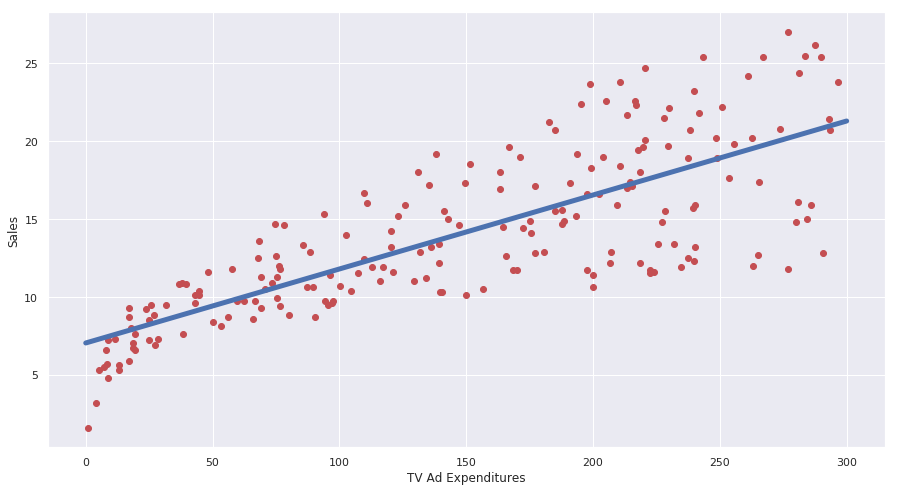

In [13]:
plt.figure(figsize=(15,8))
plt.plot(ads.TV, ads.sales, 'ro');

xticks = np.linspace(0,300,10)
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)

plt.xlabel('TV Ad Expenditures')
plt.ylabel('Sales');

### Residuals or errors

Clearly, the very few of the data points fit the linear model. The difference between the data points ($y_i$) and the predicted or modeled value ($\hat y_i$) is called the *residual* or *model error*. In other words, we have

$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i $$

where $\epsilon_i$ is the difference between the actual data and the model. In other words, $$ \epsilon_i = (y_i - \hat y_i) .$$

Let's plot the residuals for each data sample:

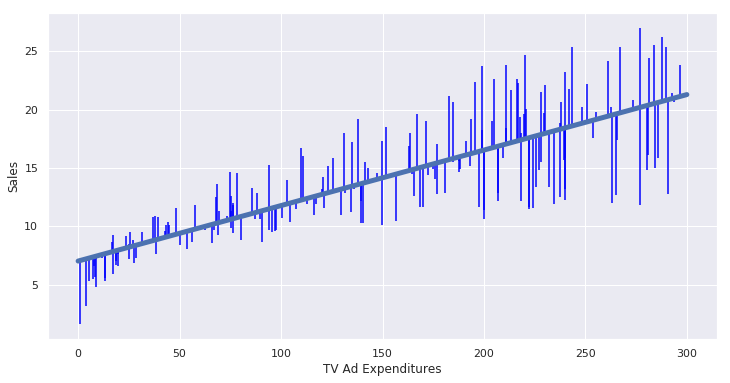

In [14]:
plt.figure(figsize=(12,6))

yhat = beta0 + beta1*ads.TV

plt.vlines(ads.TV, ymin=yhat, ymax=ads.sales, color='blue')

xticks = np.linspace(0,300,10)
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)

plt.xlabel('TV Ad Expenditures')
plt.ylabel('Sales');

The residuals are basically the length of the verticle lines above.  Let's compute the residuals for each point. In practice, we're less interested in individual residuals than we are in the *sum of the squares* of the residuals, or the *residual sum of squares* or *RSS*. This provides a single value indicating the deviation between the data and the resulting model. We will compute it ourself and [extract it from the model](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

In [15]:
residuals = ads.sales - yhat

RSS = np.sum( residuals ** 2)

print('RSS is', RSS, 'and RSS from statsmodel is', np.sum(model.resid**2))

RSS is 2102.5305831313512 and RSS from statsmodel is 2102.5305831313512


The minimum RSS reported in the text (2.1) is RSS/1000 -- this is scaled to make the diagrams easier to read.

### Assessing the accuracy of the coefficients

Both $\hat\beta_0$ and $\hat\beta_1$ are *estimates* of the "true" or "population" regression parameters $\beta_0$ and $\beta_1$ in the population regresion model $Y = \beta_0 + \beta_1 X + \epsilon$ where $\epsilon$ is the model bias (i.e. effects not captured by the linear model). In this dataset, we don't know the population model.

An alternate model for $\hat y_i$ would be to use the mean value for each estimate $\hat y_i = \bar y$. 

Earlier, we found that $\bar y$ is better represented as an interval estimate based on the *standard error* of the estimate, $Var( \bar y ) = SE(\bar y)^2 = \frac{\sigma^2}{n}$ and then e.g. 95% confidence interval is $\bar y \pm 1.96 SE(\bar y)$ using the normal distribution:

In [14]:
stats.norm.interval(0.95, loc=np.mean(y), scale= stats.sem(y))

(13.299410699220354, 14.745589300779651)

Similarly, we should compute confidence intervals for the $\beta$ paramaters. 

We can compute the standard error of $\hat \beta_0$ and $\hat \beta_1$ as indicated in the book. First, we compute the Root Square Error as an estimate of the standard error of the residuals.

In [16]:
RSE = np.sqrt(RSS / (len(residuals)-2))

print('RSE is ', RSE, 'and model RSE is', np.sqrt(model.mse_resid))

RSE is  3.2586563686504624 and model RSE is 3.258656368650463


In [17]:
x = ads.TV
y = ads.sales

se_b0 = np.sqrt( (RSE**2) * (1/len(residuals) + np.mean(x)**2 / np.sum((x - np.mean(x))**2)) )

se_b1 = RSE / np.sqrt( (np.sum((x - np.mean(x))**2)) )

print('se_b0 is', se_b0, 'se_b1 is', se_b1)

se_b0 is 0.4578429402734785 se_b1 is 0.0026906071877968703


From this, we can derive the 95% confidence intervals:

In [18]:
tval = stats.t(len(residuals)-2).ppf(1-0.05/2)
print('B0 95% confidence interval is', beta0 - se_b0 * tval, '...', beta0 + se_b0 * tval)
print('B1 95% confidence interval is', beta1 - se_b1 * tval, '...', beta1 + se_b1 * tval)

B0 95% confidence interval is 6.129719268805536 ... 7.9354678294498555
B1 95% confidence interval is 0.04223071603269883 ... 0.0528425648333407


In [18]:
model.bse

Intercept    0.457843
TV           0.002691
dtype: float64

In [19]:
model.conf_int(0.05)

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

Let's look at the model again and notice the $t$-value and $p$-value reports. These are basically the same as the confidence interval equivalents.

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.47e-42
Time:                        16:34:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Sum of Squares - How good is our model?

We would like to have some measure or metric that indicates how good this model is, but of course, we have to ask "compared to what". 

An alternate model could be that the independent variable doesn't influence the dependent variable in any way, and that it's reasonable to use the average $\bar y$ to predict individual $y_i$.

Let's diagram that and show the error between the model (mean y) and the actual data.

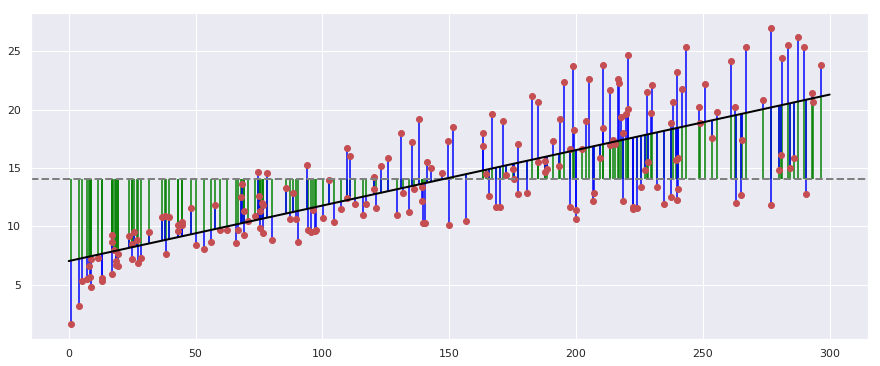

In [21]:
plt.figure(figsize=(15,6))
plt.plot(ads.TV, ads.sales, 'ro')
plt.vlines(ads.TV, ymin=ads.sales.mean(), ymax=yhat, color='green')
plt.vlines(ads.TV, ymin=yhat, ymax=ads.sales, color='blue')
xticks = np.linspace(0,300,10)
plt.axhline(ads.sales.mean(), linestyle='--', lw=2, color='grey')
plt.plot(xticks, beta0 + beta1 * xticks, lw=2, color='black')
#plt.xlim(200,300)

In this diagram, the red dots are the original data $y_i$, the flat dashed line is $\bar y$ and the sloped line is the regression $\hat y$ line. The green bars are $\hat y_i - \bar y$ and the blue lines are $y_i - \hat y_i$ (e.g. $\epsilon_i$).

The squared sum of the blue and green lines is called the *total sum of squares* (TSS)

$$ TSS = \sum_i (y_i - \bar y) $$

and they represent the variability in the data set. Confusingly, this is also commonly known as the *sum of the squares of the total* (SST). If there was no variability, each value would equal the mean and the TSS would be zero.


The sum of the blue lines is the RSS $$ RSS = \sum_i (y_i - \hat y_i)^2 $$, and again, confusingly, this is commonly known as the *sum of the square of the residurals* (SSR). As before, this is the variation between our regression model and the actualy data -- a large RSS or SSR is bad because it means our model is bad.

There's another term, the $$ SSE = \sum_i ( \hat y_i - \bar y )^2 $$ called the *sum of the squares explained* (SSE). This is the variation "explained" by the regression model. In other words, this is the variation in the data that is "explained" by using a regression model ($\hat y_i$) rather than using a simple mean of the data, $\bar y$. 

If this value is low, it means that the regression model is almost equivilent to just using $\bar y$ to model the data and perahps you should rethink using a regression model.

We've already computed the RSS. Let's compute the TSS and SSE.

In [22]:
TSS = np.sum( (ads.sales.mean() - ads.sales)**2 )
SSE = np.sum( (yhat - ads.sales.mean()) ** 2 )
print('TSS', TSS, 'RSS', RSS, 'SSE', SSE)

TSS 5417.148749999998 RSS 2102.5305831313503 SSE 3314.618166868651


This variation adds up as sums of squares -- *e.g.* $$ TSS = RSS + SSE $$, or using the notation more common in other locations $$SST = SSR + SSE $$

In [23]:
print('RSS + SSE', RSS + SSE)

RSS + SSE 5417.148750000001


The TSS value is the total variation in the data, and the RSS is the error due to residuals of the alternative models. It turns that TSS-RSS is the variation in the data *explained by the regression* as opposed to by the *errors* or *residuals*. 

Again, this value is called the [the explained sum of squares](https://en.wikipedia.org/wiki/Explained_sum_of_squares) and SSE = SST-SSR. The ratio of SSE/SST is then the percentage of variation in the data "explained" by the regression model. Let's take examine a single data point and show the parts involved:

In [24]:
(TSS-RSS) / TSS

0.611875050850071

It turns out this is the same as the $R^2$ value from the regression model

In [25]:
model.rsquared

0.61187505085007099

And, for the simple regression model, it's the same as the *square of the correlation* between the $X$ and $Y$ data.

In [26]:
np.corrcoef(ads.TV, ads.sales)**2

array([[ 1.        ,  0.61187505],
       [ 0.61187505,  1.        ]])

This parameter, $R^2$ is a "goodness of fit" parameter of the model. If the $R^2 = 1.0$, then the model predicts the data perfectly; if the $R^2 = 0$, then the model could be just as easily explained by using the average $\bar y$ value rather than the regression model.

We can also extract TSS, RSS and SSE from the `statsmodel` model:

In [27]:
model.centered_tss

5417.1487500000003

In [28]:
model.ssr

2102.5305831313517

In [29]:
model.ess

3314.6181668686486

### Other information and using Seaborn

The Seaborn library has additional plots that provide more information about the regression model corresponding to information provided by the R-system's `plot.lm` package. Some of these plots are very useful to understand and some of the information is also available from `statsmodel`

First, let's look at the confidence interval for both known and predicted values using the Seaborn library. Seaborn computes confidence estimates using a bootstrap, but the result is more or less the same as we would get from `statsmodel`, which uses t-tests. I'm going to compute this with a high confidence level.

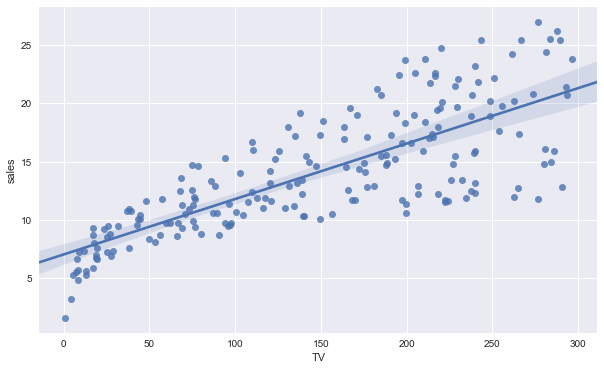

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x="TV", y = "sales", data=ads, ci=99);

Note that the confidence interval "bows" -- it's wider at the ends than at the middle. This makes sense as you're further away from known data.

This model fits poorly at the lower end. We might want to split the model based on another factor *e.g.* one model for a small number of TV ads and another for more TV ads. We can use the [seaborn `lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to plot multiple regression models in one plot or side by side.

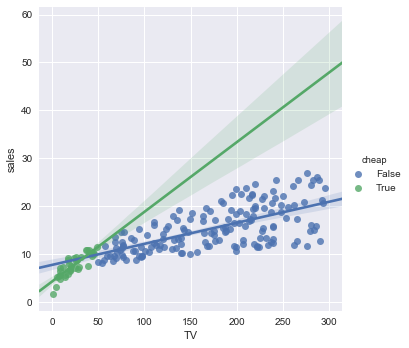

In [31]:
ads['cheap'] = ads.TV < 50

sns.lmplot(x='TV', y = 'sales', hue='cheap', data=ads);

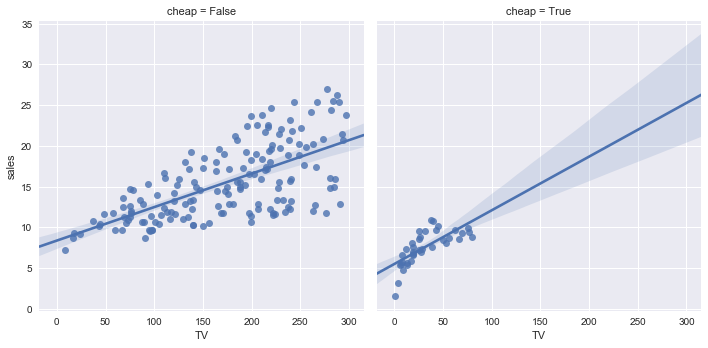

In [55]:
ads['cheap'] = (ads.TV + ads.radio + ads.newspaper ) < 100

sns.lmplot(x='TV', y = 'sales', col='cheap', data=ads);

### Diagnostic plots

The R library has a series of *diagnostic plots* that help you determine if your model is a good fit. [Unfortunately, there's not a simple corresponding way to do this in Python, although this blog post shows how to emulate them with way too much code](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)

In [57]:
import statsmodels
import statsmodels.api as sm

The residuals are supposed to be normally distributed -- if they're not, it will likely introduce errors in your model that are not clear from measurement such as $R^2$. You'd want to check the residuals against the theoretical quantile of the normal distibution.

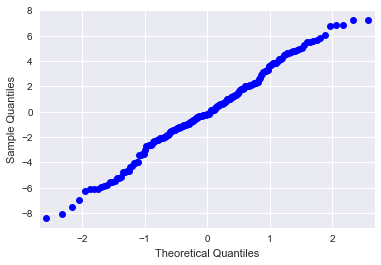

In [59]:
sm.qqplot(model.resid);

Data values where the independent variable is far away from others are said to have *high leverage* ( see https://en.wikipedia.org/wiki/Leverage_(statistics) ). These can influence the regression model disproportionality and a leverage plot (plotting leverage *vs* residual) is commonly used to highlight these points).

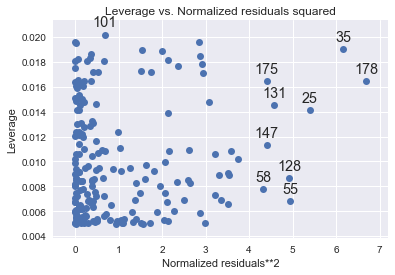

In [60]:
sm.graphics.plot_leverage_resid2(model, alpha=0.05);

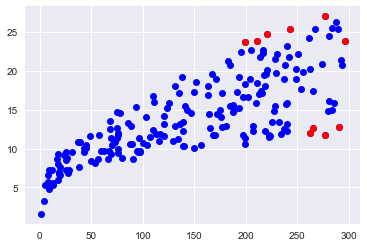

In [68]:
lev = [101,35,175,178,131,25,147,128,58,55]
#lev = [101]
plt.plot(ads.TV, ads.sales, 'bo')
plt.plot(ads.TV[lev], ads.sales[lev], 'ro');